# A/B Test - Marketing Data Analysis

Dataset Hypotheses  
• Hypotheses — brief specifics of the hypotheses  
• Reach — user reach, on a scale of one to ten  
• Impact — impact on users, on a scale of one to ten  
• Confidence — confidence in the hypotheses, on a scale of one to ten  
• Effort — the resources required to test a hypothesis, on a scale of one to ten. The higher the Effort value, the more resources are required for the test.  
<br>
Dataset Orders  
• transactionId — order identifier  
• VisitorId — identifier of the user who placed the order  
• date — place order  
• recipe — from order  
• group — the A/B test group the user belongs to  
<br>
Dataset Visits  
• date — data  
• group — A/B testing group  
• visits — the number of visits on the specified data for the specified A/B test group  

## Importing libraries, reading dataframes and data overview

In [320]:
# Importing libraries
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
#import plotly.express as px


In [321]:
# Reading Datasets
df_hypotheses = pd.read_csv('hypotheses_us.csv', sep=";")
df_orders = pd.read_csv('orders_us.csv')
df_orders['date'] = df_orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

df_visits = pd.read_csv('visits_us.csv')
df_visits['date'] = df_visits['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [322]:
# Data overview
print(df_hypotheses.head(5))
print()

df_hypotheses.info()
print()

print(df_orders.head(5))
print()

df_orders.info()
print()

print(df_visits.head(5))
print()

df_visits.info()
print()

                                          Hypothesis  Reach  Impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   

   Confidence  Effort  
0           8       6  
1           4      10  
2           7       3  
3           3       8  
4           1       1  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+

## Pre Processing Data


### Checking duplicated lines

In [323]:
# Counting duplicated values at in the Dataframe df_hypotheses
total_duplicated_df_hypotheses = df_hypotheses.duplicated().sum()
print("Linhas inteiramente duplicadas em df_hypoyheses:", total_duplicated_df_hypotheses)

# Counting duplicated values at in the Dataframe df_orders
total_duplicated_df_orders = df_orders.duplicated().sum()
print("Linhas inteiramente duplicadas em df_orders:", total_duplicated_df_orders)

# Counting duplicated values at in the Dataframe df_visits
total_duplicated_df_visits = df_visits.duplicated().sum()
print("Linhas inteiramente duplicadas em df_visits:", total_duplicated_df_visits)

Linhas inteiramente duplicadas em df_hypoyheses: 0
Linhas inteiramente duplicadas em df_orders: 0
Linhas inteiramente duplicadas em df_visits: 0


### Checking other duplicated info

#### Duplicated in df_visitors['transactionId']

In [324]:
# Check duplicated 'transactionId'
duplicated_transactions = df_orders[df_orders['transactionId'].duplicated()]

# Print results
if not duplicated_transactions.empty:
    print("Lines with duplicated 'transactionId':")
    print(duplicated_transactions)
else:
    print("None duplicated 'transactionId' was found.")

None duplicated 'transactionId' was found.


#### Duplicated in df_visitors['visitorId']

In [325]:
# Check duplicated 'visitorId'
duplicated_visitors = df_orders[df_orders['visitorId'].duplicated()]

# Print results
if not duplicated_visitors.empty:
    print("Lines with duplicated 'visitorId':")
    print(duplicated_visitors)
else:
    print("None duplicated 'transactionId' was found.")

Lines with duplicated 'visitorId':
      transactionId   visitorId       date  revenue group
41       2594268419   237748145 2019-08-15     20.8     A
91       3176574859  2742574263 2019-08-22    275.9     B
95        372616894   457167155 2019-08-22     20.2     B
98       1962247337  2706377257 2019-08-01    110.7     A
112      1638982251  3062433592 2019-08-01    135.3     B
...             ...         ...        ...      ...   ...
1182     2682156369  1668030113 2019-08-14     20.8     B
1183     1458356232   963407295 2019-08-14     80.0     A
1184     1329499668  2949041841 2019-08-14    160.7     B
1189     4082620617   393266494 2019-08-14    490.4     B
1195     1947021204  1614305549 2019-08-14      5.5     A

[166 rows x 5 columns]


In [326]:
# Check different values in the column 'group' for each visitorId
visitors_groups = df_orders.groupby('visitorId')['group'].nunique()

# Filtering visitorIds associated to more than one group
multiple_groups = visitors_groups[visitors_groups > 1].index

# Print results
if not multiple_groups.empty:
    print("VisitorIDs associated to different groups:")
    print(multiple_groups)
else:
    print("None visitorId is associated to multiple groups.")

VisitorIDs associated to different groups:
Index([   8300375,  199603092,  232979603,  237748145,  276558944,  351125977,
        393266494,  457167155,  471551937,  477780734,  818047933,  963407295,
       1230306981, 1294878855, 1316129916, 1333886533, 1404934699, 1602967004,
       1614305549, 1648269707, 1668030113, 1738359350, 1801183820, 1959144690,
       2038680547, 2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
       2600415354, 2654030115, 2686716486, 2712142231, 2716752286, 2780786433,
       2927087541, 2949041841, 2954449915, 3062433592, 3202540741, 3234906277,
       3656415546, 3717692402, 3766097110, 3803269165, 3891541246, 3941795274,
       3951559397, 3957174400, 3963646447, 3972127743, 3984495233, 4069496402,
       4120364173, 4186807279, 4256040402, 4266935830],
      dtype='int64', name='visitorId')


In [327]:
# Identifying which 'group' of the first transaction for each 'visitorId'
first_group_per_visitor = df_orders.groupby('visitorId')['group'].first()

# Update df_orders to have each 'visitorId' associated with the group of the first transaction
df_orders['group'] = df_orders['visitorId'].map(first_group_per_visitor)
df_orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,B


### Comments:
a) There are no missing values in any dataframe.  
b) Dates types were the only inconsistent type of data. It was fixed to datetime.  
c) There are no duplicated lines in any dataframes.  
d) There are no duplicated values in the column transactionId.  
e) There was 166 rows with duplicated values in the column visitorId. This was because for some visitorId there was different groups associated (A and B). The dataframe was cleaned to keep only the first occurrence of each visitorId.

## Prioritizing Hypothesis
### Calculating ICE Score

In [328]:
# Apply the ICE framework to prioritize hypotheses. Rank them in descending order of priority.

df_hypotheses['ICE'] = ((df_hypotheses['Impact']*df_hypotheses['Confidence']) / df_hypotheses['Effort']).round(2)
print(df_hypotheses.sort_values('ICE', ascending = False))

                                          Hypothesis  Reach  Impact  \
8  Launch a promotion that gives users discounts ...      1       9   
0  Add two new channels for attracting traffic. T...      3      10   
7  Add a subscription form to all the main pages....     10       7   
6  Show banners with current offers and sales on ...      5       3   
2  Add product recommendation blocks to the store...      8       3   
1  Launch your own delivery service. This will sh...      2       5   
5  Add a customer review page. This will increase...      3       2   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   

   Confidence  Effort    ICE  
8           9       5  16.20  
0           8       6  13.33  
7           8       5  11.20  
6           8       3   8.00  
2           7       3   7.00  
1           4      10   2.00  
5           2       3   1.33  
3           3       8   1.12  
4         

### Calculating RICE Score

In [329]:
# Apply the RICE framework to prioritize hypotheses. Rank them in descending order of priority.

df_hypotheses['RICE'] = ((df_hypotheses['Reach']*df_hypotheses['Impact']*df_hypotheses['Confidence']) / df_hypotheses['Effort']).round(2)
print(df_hypotheses.sort_values('RICE', ascending = False))  

                                          Hypothesis  Reach  Impact  \
7  Add a subscription form to all the main pages....     10       7   
2  Add product recommendation blocks to the store...      8       3   
0  Add two new channels for attracting traffic. T...      3      10   
6  Show banners with current offers and sales on ...      5       3   
8  Launch a promotion that gives users discounts ...      1       9   
3  Change the category structure. This will incre...      8       3   
1  Launch your own delivery service. This will sh...      2       5   
5  Add a customer review page. This will increase...      3       2   
4  Change the background color on the main page. ...      3       1   

   Confidence  Effort    ICE   RICE  
7           8       5  11.20  112.0  
2           7       3   7.00   56.0  
0           8       6  13.33   40.0  
6           8       3   8.00   40.0  
8           9       5  16.20   16.2  
3           3       8   1.12    9.0  
1           4      10  

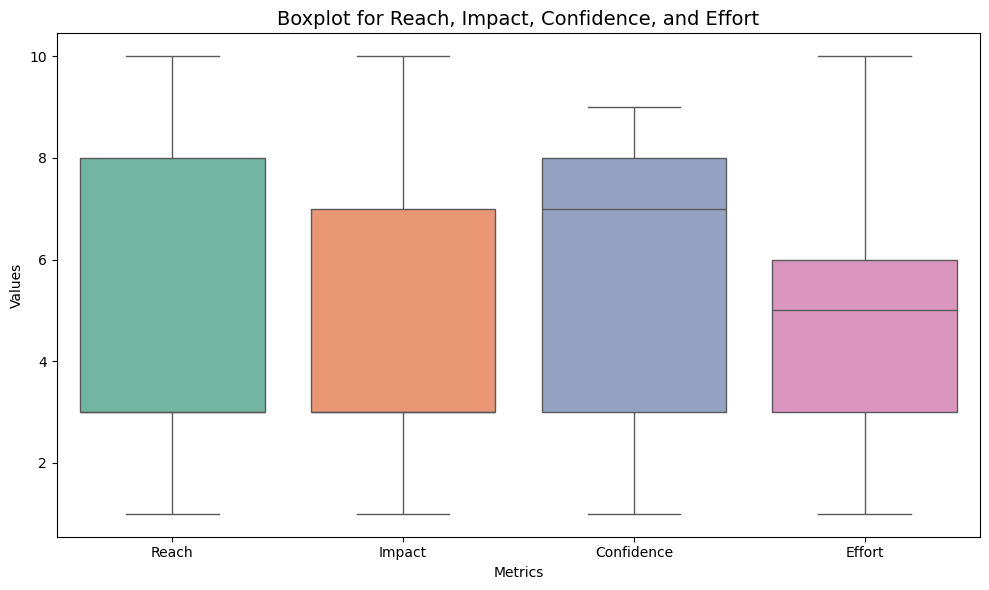

In [330]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_hypotheses[["Reach", "Impact", "Confidence", "Effort"]], palette="Set2")
plt.title("Boxplot for Reach, Impact, Confidence, and Effort", fontsize=14)
plt.ylabel("Values")
plt.xlabel("Metrics")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

### Comments
There is a significant change of the hypothesis prioritization when using RICE instead of ICE. The 'Reach' information has a huge influence in the scores, since it appears in the equation as a multiplier. 
At both cases, the hypothesis of "Change the background color on the main page. This will increase user engagement." is the one with less priority.

## Analysis, Metrics, A/B Test

### 1. Creating a graph of the cumulative revenue by group. Draw conclusions and make hypotheses.

#### Organizing data and creating graph

In [331]:
datesGroups = df_orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: df_orders[
        np.logical_and(
            df_orders['date'] <= x['date'], df_orders['group'] == x['group']
        )
    ].agg(
        {
            'date' : 'max', 
            'group' : 'max', 
            'transactionId' : pd.Series.nunique, 
            'visitorId' : pd.Series.nunique, 
            'revenue' : 'sum'
        }
    ), 
    axis=1
).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(
    lambda x: df_visits[
        np.logical_and(
            df_visits['date'] <= x['date'], df_visits['group'] == x['group']
        )
    ].agg(
        {
            'date' : 'max', 
            'group' : 'max', 
            'visits' : 'sum'
        }
    ), 
    axis=1
).sort_values(by=['date','group'])

ordersAggregated = ordersAggregated.sort_values(
    by=['date', 'group']
)

visitorsAggregated = visitorsAggregated.sort_values(
    by=['date', 'group']
)

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date', 
    'group', 
    'orders', 
    'buyers', 
    'revenue', 
    'visitors'
]

cumulativeRevenueA = cumulativeData[
    cumulativeData['group']=='A'
][
    ['date','revenue', 'orders']
]


cumulativeRevenueB = cumulativeData[
    cumulativeData['group']=='B'
][
    ['date','revenue', 'orders']
]

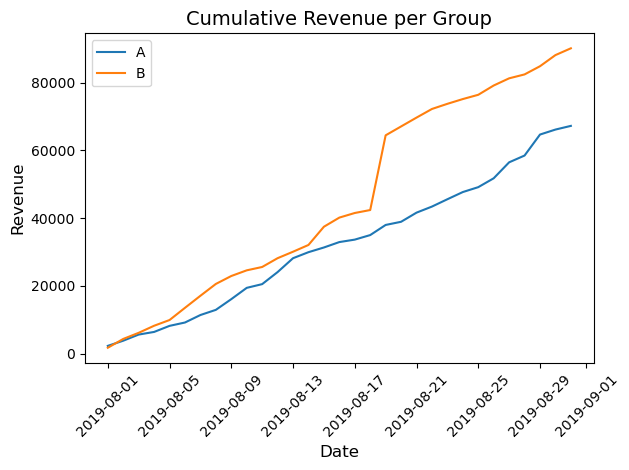

In [332]:
# Plot for group A revenue
plt.plot(
    cumulativeRevenueA['date'], 
    cumulativeRevenueA['revenue'], 
    label='A'
)

# Plor for group B revenue 
plt.plot(
    cumulativeRevenueB['date'], 
    cumulativeRevenueB['revenue'], 
    label='B'
)

# Adding legend
plt.legend()

# Adding axis titles
plt.xlabel("Date", fontsize=12)
plt.ylabel("Revenue", fontsize=12)

# Adding a plot title
plt.title("Cumulative Revenue per Group", fontsize=14)

# Rotating the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Showing the plot
plt.tight_layout()
plt.show()


#### Comments
Group B took the lead from the beggining of the test and remained ahead. It seems that ridiculously large orders affected the results. These should be discarded when conducting the final analysis.

### 2. Create a graph of the average cumulative order size by group. Draw conclusions and make hypotheses.

#### Organizing data and creating graph

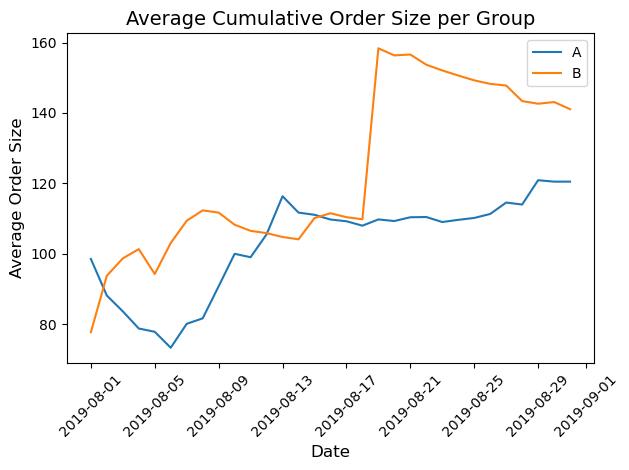

In [333]:
# Plot for group A
plt.plot(
    cumulativeRevenueA['date'], 
    cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], 
    label='A'
)


# Plor for group B
plt.plot(
    cumulativeRevenueB['date'], 
    cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], 
    label='B'
)

# Adding legend
plt.legend()

# Adding axis titles
plt.xlabel("Date", fontsize=12)
plt.ylabel("Average Order Size", fontsize=12)

# Adding a plot title
plt.title("Average Cumulative Order Size per Group", fontsize=14)

# Rotating the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Showing the plot
plt.tight_layout()
plt.show()


#### Comments
The cumulative value of the average purchase volumes by group still shows fluctuations. It is necessary to analyze the outliers that are distorting the results.

### 3. Create a graph of the relative difference in the average cumulative order size for group B compared to group A. Draw conclusions and make hypotheses.

#### Organizing data and creating graph

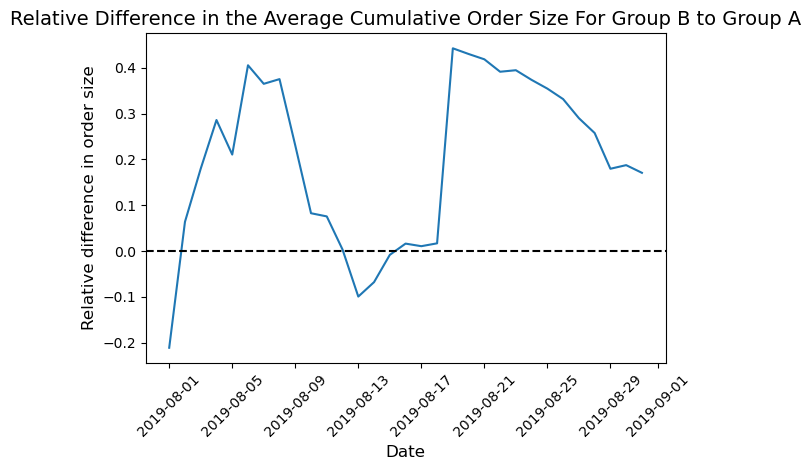

In [334]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, 
    left_on='date', 
    right_on='date', 
    how='left', 
    suffixes=['A', 'B']
)

# Creating graph of the relative difference in the average cumulative order size 
plt.plot(
    mergedCumulativeRevenue['date'], 
    (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1
)

# Add line at y = o
plt.axhline(y=0, color='black', linestyle='--')

# Adding axis titles
plt.xlabel("Date", fontsize=12)
plt.ylabel("Relative difference in order size", fontsize=12)

# Adding a plot title
plt.title("Relative Difference in the Average Cumulative Order Size For Group B to Group A", fontsize=14)

# Rotating the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Showing the plot
plt.tight_layout()
plt.show()

#### Comments
There are occurrences of sudden and considerable changes. They may be related to orders that are much larger than the usual.

### 4. Calculate the conversion rate for each group as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of both groups and describe the difference. Draw conclusions and make hypotheses.

#### Organizing data and creating graph

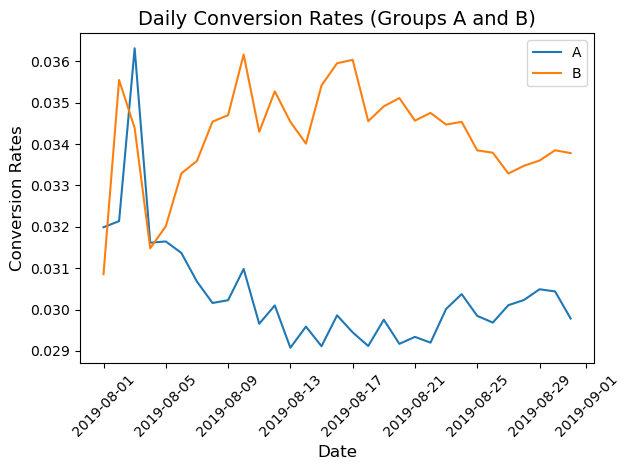

In [335]:
cumulativeData['conversion'] = (
    cumulativeData['orders'] / cumulativeData['visitors']
)

cumulativeDataA = cumulativeData[
    cumulativeData['group'] == 'A'
]
cumulativeDataB = cumulativeData[
    cumulativeData['group'] == 'B'
]


# Plot for group A
plt.plot(
    cumulativeDataA['date'], 
    cumulativeDataA['conversion'], 
    label='A'
)

# Plor for group B
plt.plot(
    cumulativeDataB['date'], 
    cumulativeDataB['conversion'], 
    label='B'
)

# Adding legend
plt.legend()

# Adding axis titles
plt.xlabel("Date", fontsize=12)
plt.ylabel("Conversion Rates", fontsize=12)

# Adding a plot title
plt.title("Daily Conversion Rates (Groups A and B)", fontsize=14)

# Rotating the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Showing the plot
plt.tight_layout()
plt.show()

#### Comments
Group B leaded almost since the begining.

### 5. Create a graph of the relative difference in cumulative conversion for group B compared to group A. Draw conclusions and make hypotheses.

#### Organizing data and creating graph

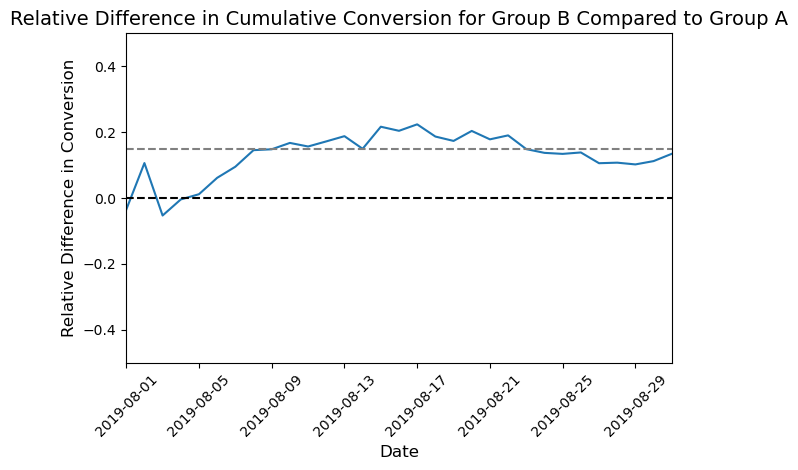

In [336]:
mergedCumulativeConversions = cumulativeDataA[
    ['date','conversion']
].merge(
    cumulativeDataB[['date','conversion']], 
    left_on='date', 
    right_on='date', 
    how='left', 
    suffixes=['A', 'B']
)

plt.plot(
    mergedCumulativeConversions['date'], 
    (mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
)

plt.axhline(
    y=0, 
    color='black', 
    linestyle='--'
)

plt.axhline(
    y=0.15, 
    color='grey', 
    linestyle='--'
)

plt.axis(
    [
        pd.to_datetime('2019-08-01'), 
        pd.to_datetime('2019-08-31'), 
        -0.5, 
        0.5
    ]
)

# Adding axis titles
plt.xlabel("Date", fontsize=12)
plt.ylabel("Relative Difference in Conversion", fontsize=12)

# Adding a plot title
plt.title("Relative Difference in Cumulative Conversion for Group B Compared to Group A", fontsize=14)

# Rotating the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Showing the plot
plt.tight_layout()
plt.show()

#### Comments
Group B leaded almost all the time and seems to be stabilizing around 15% at the end of the period. 

### 6. Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.

#### Creating dataframe and calculating percentiles

          userId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


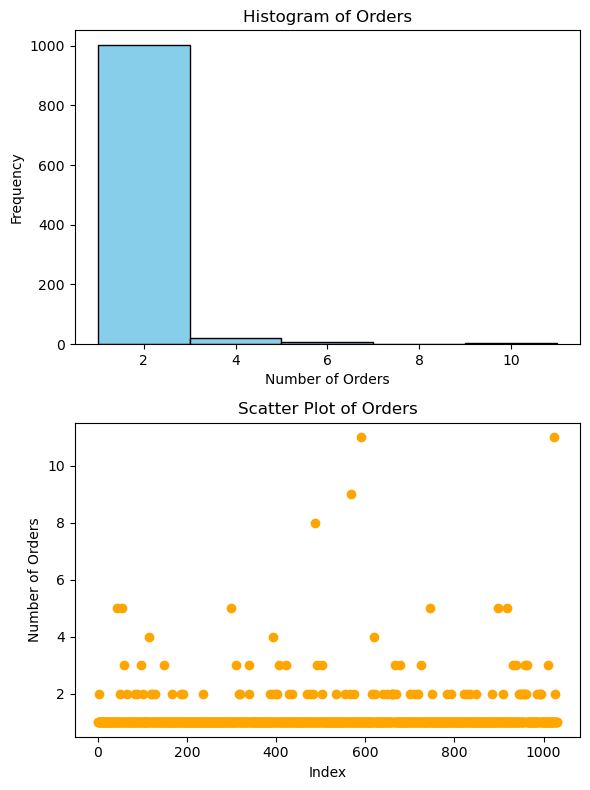

O percentil 95% é 2.00 e o percentil 99% é 4.00.


In [337]:
# Organizing data
ordersByUsers = (
    df_orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId' : pd.Series.nunique})
)

ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

# Plots 
# X-axis for the scatter plot
x_values = pd.Series(range(0, len(ordersByUsers['orders'])))

# Creating figure with 2 subplots
fig, axes = plt.subplots(2, 1, figsize=(6, 8))

# First plot: histogram
axes[0].hist(ordersByUsers['orders'], bins=5, color='skyblue', edgecolor='black')
axes[0].set_title("Histogram of Orders")
axes[0].set_xlabel("Number of Orders")
axes[0].set_ylabel("Frequency")

# Second plot: scatter plot
axes[1].scatter(x_values, ordersByUsers['orders'], color='orange')
axes[1].set_title("Scatter Plot of Orders")
axes[1].set_xlabel("Index")
axes[1].set_ylabel("Number of Orders")

# Adjusting layout and showing plots 
plt.tight_layout()
plt.show()

# Percentiles
# Calcs
percentilesOrders = np.percentile(ordersByUsers['orders'], [95, 99])

# Showing results
print(f"O percentil 95% é {percentilesOrders[0]:.2f} e o percentil 99% é {percentilesOrders[1]:.2f}.")


#### Comments
By the histogram it is clear that most users placed one to three orders. This info is confirmed by the scatter plot, which shows that most actually places one single order and there are almost no records of users placing more than two orders.  
Finally, analysing the percentiles, less than 5% of users placed more than two orders, and less than 1% placed more than four.

### 7. Create a scatter plot of the order prices. Draw conclusions and make hypotheses.

#### Preparing data and creating scatter plot

      transactionId  revenue
425       590470918  19920.4
1196     3936777065   3120.1
858       192721366   1450.2
1136      666610489   1425.8
744      3668308183   1335.6
662      1811671147   1220.2
682      1216533772   1220.2
743      3603576309   1050.0
1103     1348774318   1025.8
1099      316924019   1015.9


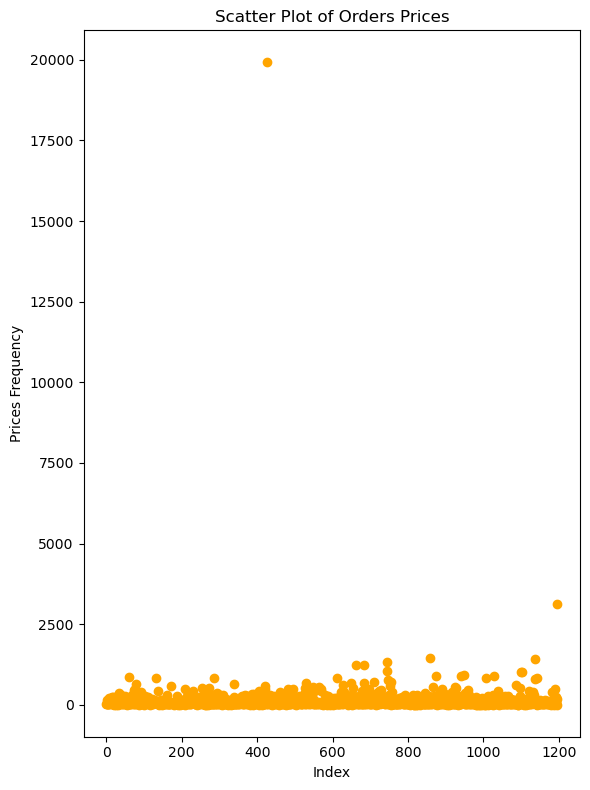

In [338]:
ordersPrices = (
    df_orders.drop(['group', 'date', 'visitorId'], axis=1)
)

print(ordersPrices.sort_values(by='revenue', ascending=False).head(10))

# Plots 
# X-axis for the scatter plot
x_values = pd.Series(range(0, len(ordersPrices['revenue'])))

# Setting figure size
plt.figure(figsize=(6, 8))

# Scatter plot
plt.scatter(x_values, ordersPrices['revenue'], color='orange')
plt.title("Scatter Plot of Orders Prices")
plt.xlabel("Index")
plt.ylabel("Prices Frequency")

# Adjusting layout and showing plots 
plt.tight_layout()
plt.show()

#### Comments
There is one very abnormal order price, of 19920.4. The second larger price is only 3120.1.

### 8. Calculate the 95th and 99th percentiles for the order prices. Define the point at which a data point becomes an anomaly.

#### Calculating the percentiles 

In [339]:
# Calcs
percentilesPrices = np.percentile(ordersPrices['revenue'], [95, 99])

# Showing results
print(f"O percentil 95% é {percentilesPrices[0]:.2f} e o percentil 99% é {percentilesPrices[1]:.2f}.")


O percentil 95% é 435.54 e o percentil 99% é 900.90.


#### Commments
Regarding the orders prices, there is one abnormal order price as stated in the previous section. The percentiles calculations confirms that showing that less than 5% of the orders had a revenue larger than 435 and less than 1% had a revenue larger than 900. 

### 9. Find the statistical significance of the difference in conversion between the groups using raw data. Draw conclusions and make hypotheses.

#### Calcs

In [340]:
# Orders by users per group
ordersByUsersA = (
    df_orders[df_orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    df_orders[df_orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']


pd.Series(
    0, 
    index=np.arange(df_visits[df_visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), 
    name='orders'
)

[ordersByUsersA['orders'],
 pd.Series(0, 
           index=np.arange(df_visits[df_visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), 
           name='orders'
           )
]

sampleA = (
    pd.concat(
        [
            ordersByUsersA['orders'],
            pd.Series(
                0, 
                index=np.arange(df_visits[df_visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),
                name='orders'
            )
        ],
        axis=0
    )
)

sampleB = (
    pd.concat(
        [
            ordersByUsersB['orders'],
            pd.Series(
                0, 
                index=np.arange(df_visits[df_visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),
                name='orders'
            )
        ],
        axis=0
    )
)


print("P-value is:", "{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Statistical significance of the difference in conversion between the groups:", "{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

P-value is: 0.01666
Statistical significance of the difference in conversion between the groups: 0.134


#### Comments
P-value is 0.01666, which is smaller than 0.05. Therefore, we reject the null hypothesis. The raw data analysis showed that the conversion rates between groups have statistical differences. The relative gain of Group B is 13.4%.

### 10. Find the statistical significance of the difference in average order size between the groups using raw data. Draw conclusions and make hypotheses.

#### Calcs

In [341]:
print("P-Value is:", '{0:.3f}'.format(stats.mannwhitneyu(df_orders[df_orders['group']=='A']['revenue'], df_orders[df_orders['group']=='B']['revenue'])[1]))

print("Statistical significance of the difference in average order size between the groups:", '{0:.3f}'.format(df_orders[df_orders['group']=='B']['revenue'].mean()/df_orders[df_orders['group']=='A']['revenue'].mean()-1))

P-Value is: 0.673
Statistical significance of the difference in average order size between the groups: 0.171


#### Comments
P-value is 0.673, which is greater than 0.05. Therefore, there isn't significative statistical difference between the order sizer between groups. The The relative gain of Group B is 17.1%.

### 11. Find the statistical significance of the difference in conversion between the groups using filtered data. Draw conclusions and make hypotheses.

#### Calcs

In [342]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = df_orders[df_orders['revenue'] > 900]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))

sampleAFiltered = (
    pd.concat(
        [ordersByUsersA[
            np.logical_not(
                ordersByUsersA['userId'].isin(abnormalUsers)
            )
        ]['orders'],
        pd.Series(
            0, 
            index=np.arange(df_visits[df_visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),
            name='orders'
        )
        ],
        axis=0
    )
)

sampleBFiltered = (
    pd.concat(
        [ordersByUsersB[
            np.logical_not(
                ordersByUsersB['userId'].isin(abnormalUsers)
            )
        ]['orders'],
        pd.Series(
            0, 
            index=np.arange(df_visits[df_visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),
            name='orders'
        )
        ],
        axis=0
    )
)

print("P-value is:", "{0:.5f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Statistical significance of the difference in conversion between the groups:", "{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))


1099    148427295
17      199603092
34      237748145
36      249864742
42      393266494
dtype: int64
P-value is: 0.01090
Statistical significance of the difference in conversion between the groups: 0.162


#### Comments
P-value is 0.01090, which is smaller than 0.05. Therefore, we can reject the null hypothesis. 
Just like observed with raw data, the statistical significance was reached. Group B is better than A. With raw data, the relative gain of group B is 13.4% and with filtered data it is 16.2%.

### 12. Find the statistical significance of the difference in average order size between the groups using filtered data. Draw conclusions and make hypotheses.

In [343]:
print("P-Value is:", 
      '{0:.3f}'.format(stats.mannwhitneyu(
        df_orders[np.logical_and(
            df_orders['group']=='A',
            np.logical_not(df_orders['visitorId'].isin(abnormalUsers)))]['revenue'],
        df_orders[np.logical_and(
            df_orders['group']=='B',
            np.logical_not(df_orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("Statistical significance of the difference in order size between the groups:", 
      '{0:.3f}'.format(
        df_orders[np.logical_and(df_orders['group']=='B',np.logical_not(df_orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
        df_orders[np.logical_and(
            df_orders['group']=='A',
            np.logical_not(df_orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

P-Value is: 0.651
Statistical significance of the difference in order size between the groups: -0.057


#### Comments
P-value is 0.651, which is greater than 0.05. Therefore, there isn't significative statistical difference between the order sizer between groups. The relative loss of Group B is 5.7%. With raw data, it was obtained a relative gain of 17.1% for group B.

### 13. Make a decision based on the test results. Possible decisions are: 1. Stop the test, consider one of the groups as the leader. 2. Stop the test, conclude that there is no difference between the groups. 3. Continue the test.

- Em relação as taxas de conversão, existe uma diferença estatística significativa na conversão entre os grupos, tanto de acordo com os dados brutos como com os filtrados. Os dados mostraram um ganho de conversão relativo para o grupo B, comparado com o grupo A. Os dados brutos indicaram um ganho de 13.4%, e os dados filtrados um ganho de 16.2%.  

- Em termos de volume médio de compra, os dados brutos não apresentaram uma diferença estatística significativa entre os grupos, tanto de acordo com os dados brutos como com os filtrados. Os dados brutos mostraram um ganho nos volumes médios de compra do grupo B, em relação ao grupo A, de 17.1%. Após a remoção das anomalias dos dados, observou-se, na verdade, uma perda nos volumes médios de compra do grupo B, em relação ao grupo A, de 5.7%.  

- O gráfico da diferença de conversão entre os grupos evidencia que os resultados do grupo B são melhores que aqueles no grupo A: eles possuem uma tendência ao crescimento ou a se estabilizarem em torno da média.  

- O gráfico da diferença no volume médio de compra mostra flutuações, o partir das quais foi possível detectar as anomalias nos dados. Não foi possível chegar a uma conclusão definitiva a partir desse gráfico.  

- O Grupo B está mostrando um aumento nas taxas de conversão, ao mesmo tempo que mostra uma redução nos volumes médios de compra, em relação ao grupo A. Baseado nos resultados, eu finalizaria o teste. 